In [1]:
import os
import random
import numpy as np, pandas as pd
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as T
import torchvision.datasets as datasets
from torchvision.io import read_image

from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

torch.manual_seed(42)

## Image Visualizations

C:\Users\H_JOLLY\AppData\Local\Temp\ipykernel_8664\4179073931.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


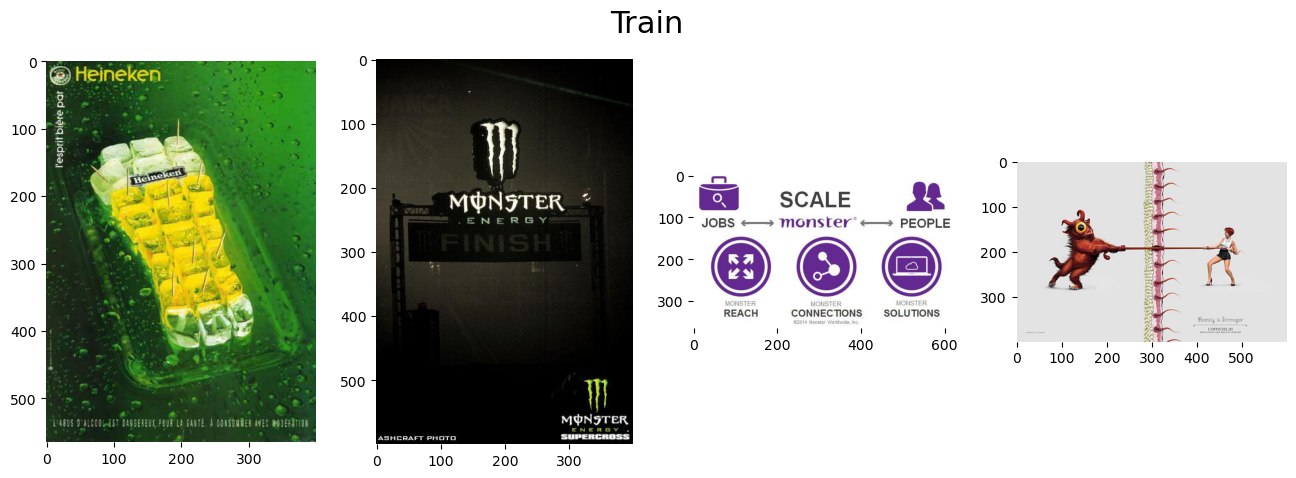

In [2]:
train = "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\"
img_path_train = os.listdir(train)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Train", size=22)

for i,image in enumerate(img_path_train[:4]):
    img = read_image(train + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

#### Image plotting function

In [12]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap = 'gray', **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
        axs[0, 1].set(title='Transformed image')
        axs[0, 1].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.tight_layout()

plt.rcParams["figure.figsize"] = (10,3)

### Single Transforms done to compare Orignal Image with Transformed Image

In [39]:
orig_img = Image.open(train + "147220.jpg")
# orig_img_train = T.ToPILImage()(orig_img)

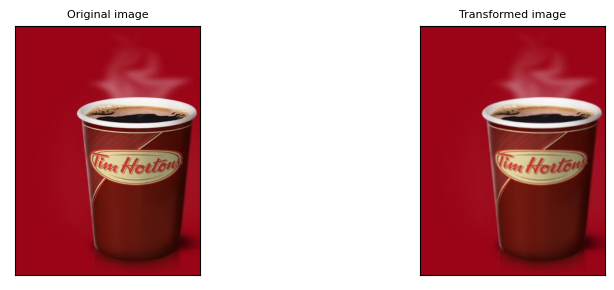

In [40]:
# simple transform applied to resize
train_resize = transforms.Compose([transforms.Resize(224)])
resized_images = [train_resize(orig_img) for _ in range(1)]
plot(resized_images)

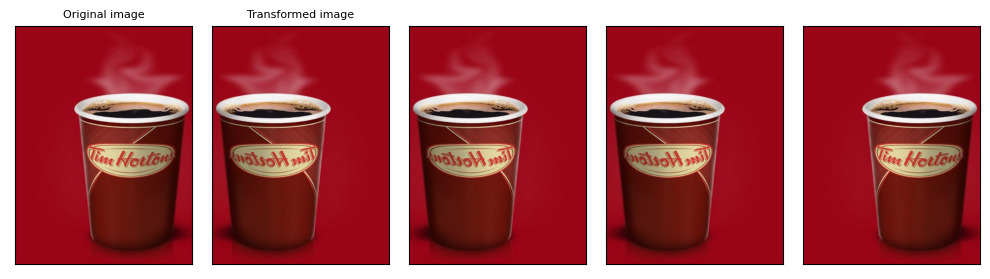

In [29]:
# simple transform applied for horizontal flips
train_hflip = transforms.RandomHorizontalFlip(p=0.8)
transformed_imgs = [train_hflip(orig_img) for _ in range(4)]
plot(transformed_imgs)

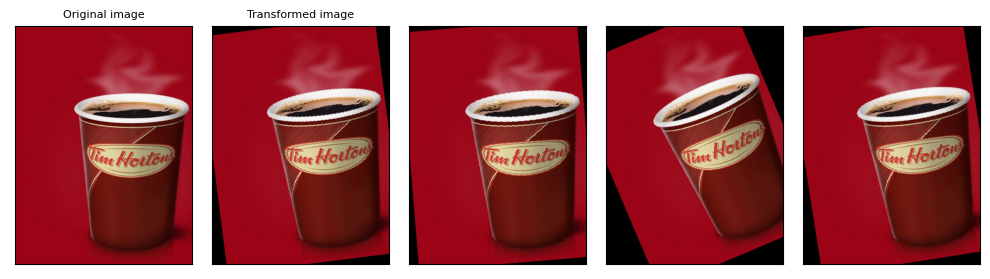

In [30]:
# simple transform applied for rotating the image
train_rotate = transforms.RandomRotation(degrees=(0, 30))
rotated_imgs = [train_rotate(orig_img) for _ in range(4)]
plot(rotated_imgs)

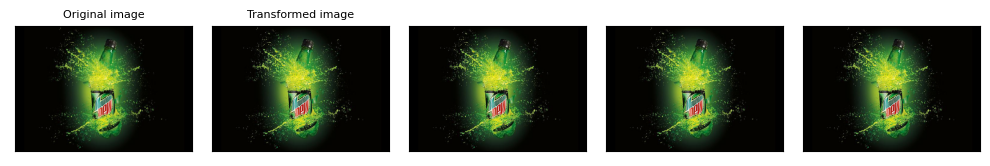

In [31]:
# simple transform applied for auto-sharpness
train_sharpness_adjuster= T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [train_sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

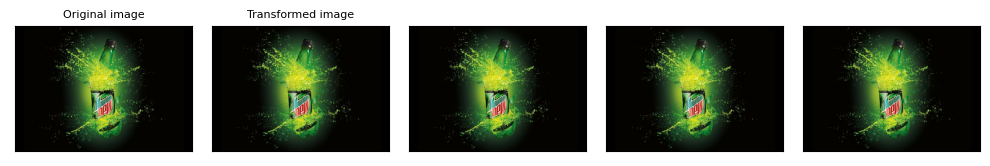

In [32]:
# simple transform applied for changing contrast 
train_contrast = transforms.RandomAutocontrast()
contrast_imgs = [train_contrast(orig_img) for _ in range(4)]
plot(contrast_imgs)

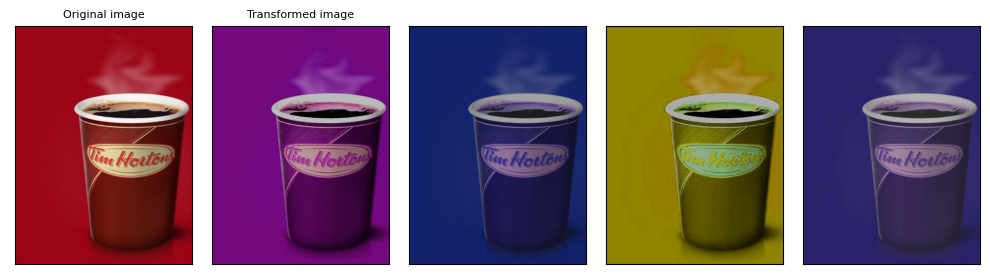

In [33]:
# simple transform applied for gaussian blur
train_jitter = transforms.ColorJitter(brightness=.5, hue=.5, saturation=.5, contrast=.5) # saturation, contrast
jitted_imgs = [train_jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

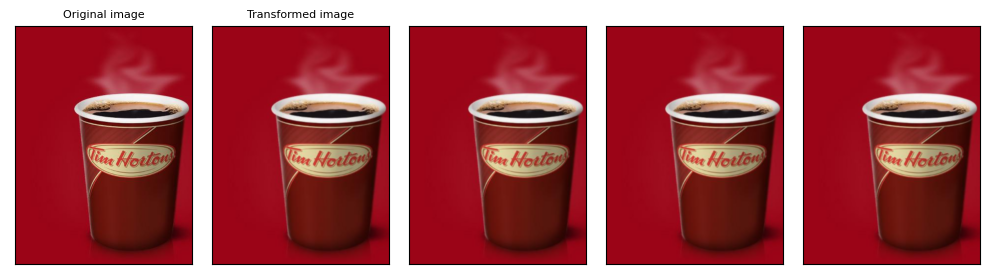

In [34]:
# simple transform applied for gaussian blur
train_gaussian_blurrer = transforms.GaussianBlur(kernel_size=(5,5), sigma=0.7)
gaussian_blurred_images = [train_gaussian_blurrer(orig_img) for _ in range(4)]
plot(gaussian_blurred_images)

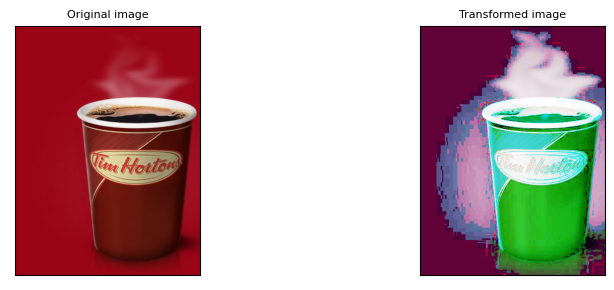

In [17]:
# Functional Transform applied for Histogram Equalization
blurred_imgs = [transforms.functional.equalize(orig_img) for _ in range(1)]
plot(blurred_imgs)